## Observations and Insights 

After administring the diffrent drugs it seems the two most effective products are Ramicane, and Capomulin.
Ramicane had the lowest tumor volume.
Ramicane, and Capomulin had the lowest std deveation.

Though a single Capomulin mouse study comparing administration of Capomulin over a number of days versus the tumor volume, 
we can see decrease in tumor volume around day 20.
Continus adminstration of the drug shows an overall decrease.


Also the data shows a positive correlation between the weight of the mice and tumor volume.
The more the mice weights the bigger the tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_total=data_complete["Mouse ID"].nunique()
print (mice_total)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#(.duplicated) helps with analilzing duplicated values
mice_dup = data_complete.loc[data_complete.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mice_dup


array(['g989'], dtype=object)

In [4]:
# Optional: Get  all the data for the duplicate mouse ID.
mice_id_dup = data_complete.loc[data_complete["Mouse ID"] == 'g989']
mice_id_dup


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
new_info = data_complete.loc[data_complete["Mouse ID"] != 'g989']
new_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = data_complete.drop_duplicates("Mouse ID")
mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_total=new_info["Mouse ID"].value_counts()
clean_data=len(clean_total)
clean_data


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#print(mean)
 
variance = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#print(variance)

standard_deviation = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#print(standard_deviation) 

 
standard_error = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#print(standard_error)

median = data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#print(median)

# Assemble the resulting series into a single summary dataframe.
stat_summary = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance,
                             "Tumor Volume Std. Dev.": standard_deviation, "Tumor Volume Std. Err.": standard_error})
stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

stat_summary2 = data_complete.groupby("Drug Regimen")
name = stat_summary2.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
print ("Tumor Volume (mm3)")
name

Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

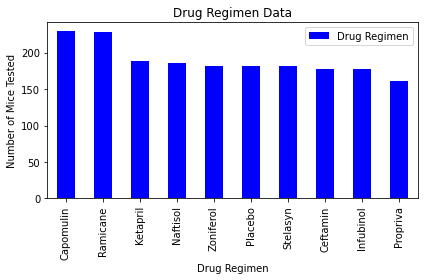

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = data_complete.groupby("Drug Regimen")
#add up each drug
drug_regimen_count = pd.DataFrame(pd.value_counts(data_complete["Drug Regimen"]))
# Create a bar chart
pandas_chart =drug_regimen_count.plot(kind="bar", title="Drug Regimen Data", color="blue")

pandas_chart.set_xlabel("Drug Regimen")                                                
pandas_chart.set_ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()
#come back to this 

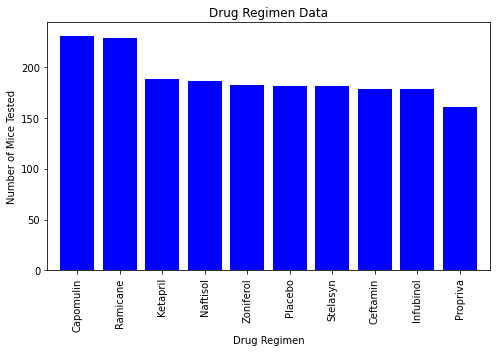

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = data_complete["Drug Regimen"].value_counts().index
y_axis = data_complete["Drug Regimen"].value_counts().index
plt.figure(figsize=(7,5))
plt.bar(x_axis, drug_regimen_count["Drug Regimen"], color = "blue")
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_regimen_count["Drug Regimen"])*1.06)
plt.xticks(x_axis, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Drug Regimen Data")
plt.tight_layout()
plt.show()

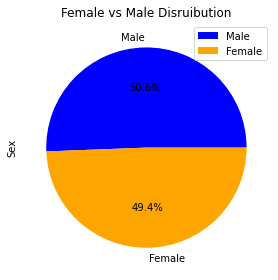

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#single out sex column
sex = data_complete.groupby("Sex")

sex_count = pd.DataFrame(pd.value_counts(data_complete["Sex"]))
# make pie chart
pandas_pie =sex_count.plot(kind="pie", colors=["blue", "orange"], title="Female vs Male Disruibution",
                           y="Sex", autopct="%1.1f%%")
#Y axis label
pandas_pie.set_ylabel("Sex")
                                               

plt.tight_layout()
plt.show()

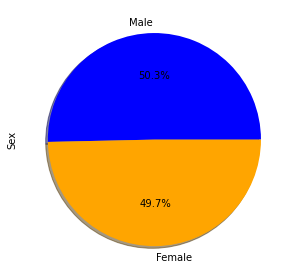

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
size = [50.6,49.9]
plt.pie(size, labels=["Male", "Female"], colors=["blue", "orange"],
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#put drugs into a list
regimen_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment = data_complete[data_complete['Drug Regimen'].isin(regimen_list)]
# Start by getting the last (greatest) timepoint for each mouse
timepoint = new_info.groupby("Mouse ID").max()["Timepoint"]
timepoint_data = pd.DataFrame(timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
complete_timepoint_merge = pd.merge(data_complete, timepoint_data, on=("Mouse ID"))
complete_timepoint_merge


,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

    

# Create empty list to fill with tumor vol data (for plotting)
tumor_values=[]
for x in regimen_list:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    df= complete_timepoint_merge.loc[complete_timepoint_merge["Drug Regimen"]== x]
    # add subset 
    df_final= df.loc[df["Timepoint_x"]==df["Timepoint_y"]]

    tumor_volume = df_final["Tumor Volume (mm3)"]
    tumor_values.append(tumor_volume)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile
    lower_bound =  lower_quartile -(IQR*1.5)
    upper_bound =  upper_quartile + (IQR*1.5)
    print(f"The lower quartile of {x} is: {lower_quartile}")
    print(f"The upper quartile of {x} is: {upper_quartile}")
    print(f"The interquartile range of {x} is: {IQR}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    outliers = df_final.loc[(df_final["Tumor Volume (mm3)"] > upper_bound) | (df_final["Tumor Volume (mm3)"] < lower_bound)]
    print(f"The outliers of {x} is: {outliers}")
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The outliers of Capomulin is: Empty DataFrame
Columns: [Mouse ID, Timepoint_x, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Timepoint_y]
Index: []
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The outliers of Ramicane is: Empty DataFrame
Columns: [Mouse ID, Timepoint_x, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Timepoint_y]
Index: []
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.

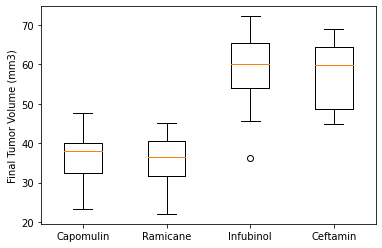

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

new= complete_timepoint_merge.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
new_df= pd.DataFrame(new)
Tumors= new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
Tumor_volume= pd.DataFrame(Tumors)
Tumor_volume=Tumor_volume.reindex(regimen_list)
Tumor_volume_final=[x for x in Tumor_volume["Tumor Volume (mm3)"]]
plt.boxplot(Tumor_volume_final, labels = regimen_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

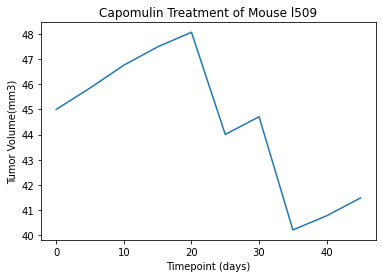

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = new_info.loc[new_info["Mouse ID"]=="l509"]
x_axis = capomulin["Timepoint"]
y_axis = capomulin["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

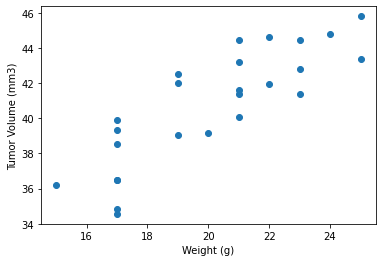

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = new_info.loc[new_info["Drug Regimen"]=="Capomulin"]
x_axis = capomulin_scatter.groupby(capomulin_scatter["Mouse ID"])["Weight (g)"].mean()
y_axis = capomulin_scatter.groupby(capomulin_scatter["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis, y_axis)

plt.xlabel('Weight (g)')
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

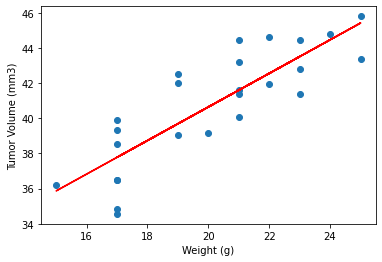

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_scatter = new_info.loc[new_info["Drug Regimen"]=="Capomulin"]
x_axis = capomulin_scatter.groupby(capomulin_scatter["Mouse ID"])["Weight (g)"].mean()
y_axis = capomulin_scatter.groupby(capomulin_scatter["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values, "r-")

plt.xlabel('Weight (g)')
plt.ylabel("Tumor Volume (mm3)")
plt.show()
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")